<a href="https://colab.research.google.com/github/ugurcun/car_sellling_price/blob/main/car_sellling_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from google.colab import files
data = files.upload()

Saving car data.csv to car data.csv


In [12]:
car_data = pd.read_csv("car data.csv")

In [13]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [17]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [21]:
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [22]:
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']

In [23]:
from matplotlib import style

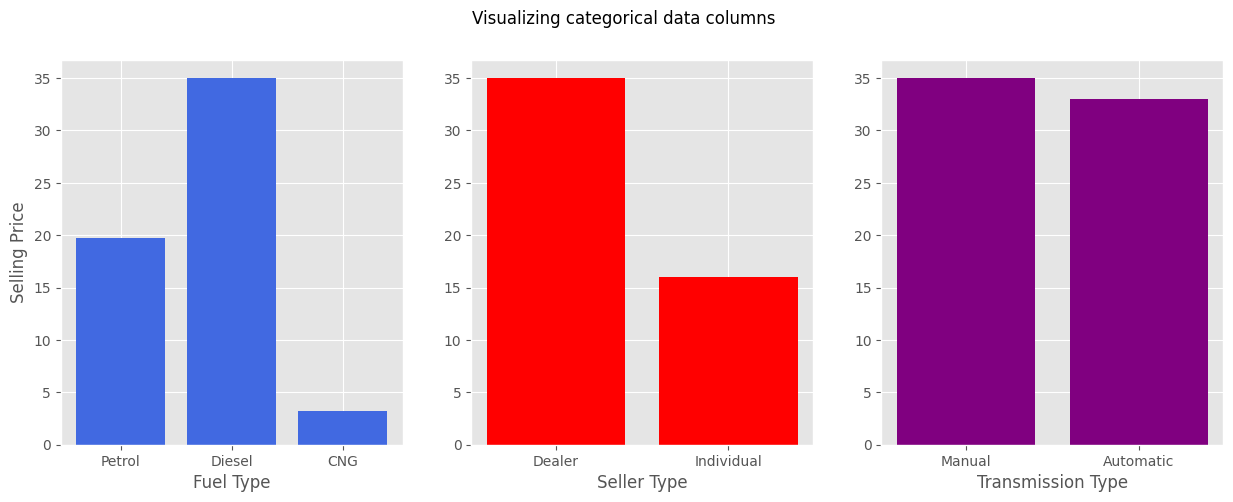

In [25]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type,selling_price, color='purple')
plt.xlabel("Transmission Type")
plt.show()

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

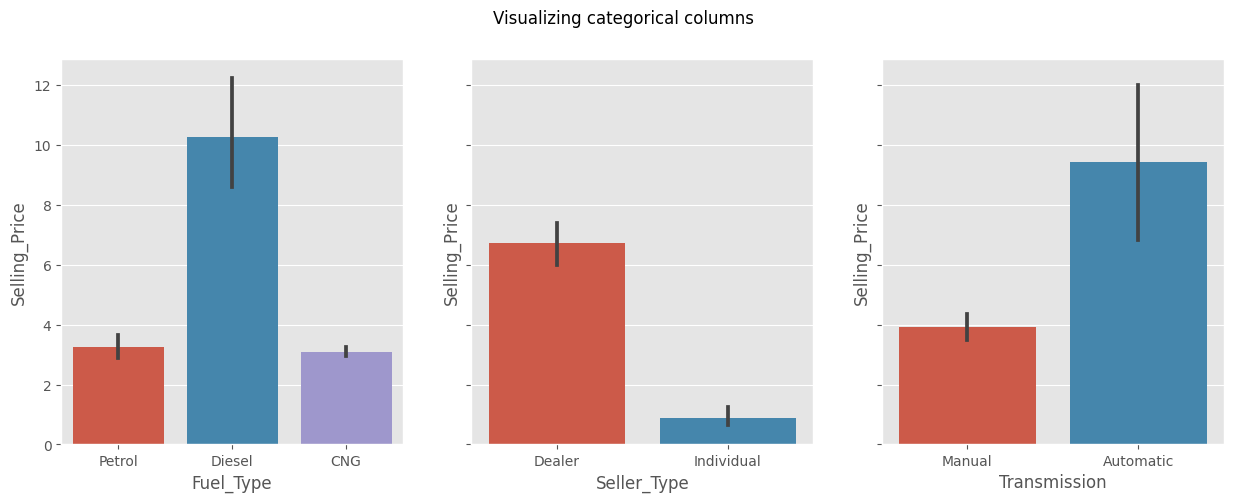

In [27]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical columns')
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

In [29]:
#manual encoding
car_data.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
#one hot encoding
car_data = pd.get_dummies(car_data, columns=['Seller_Type', 'Transmission'], drop_first=True)

In [30]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


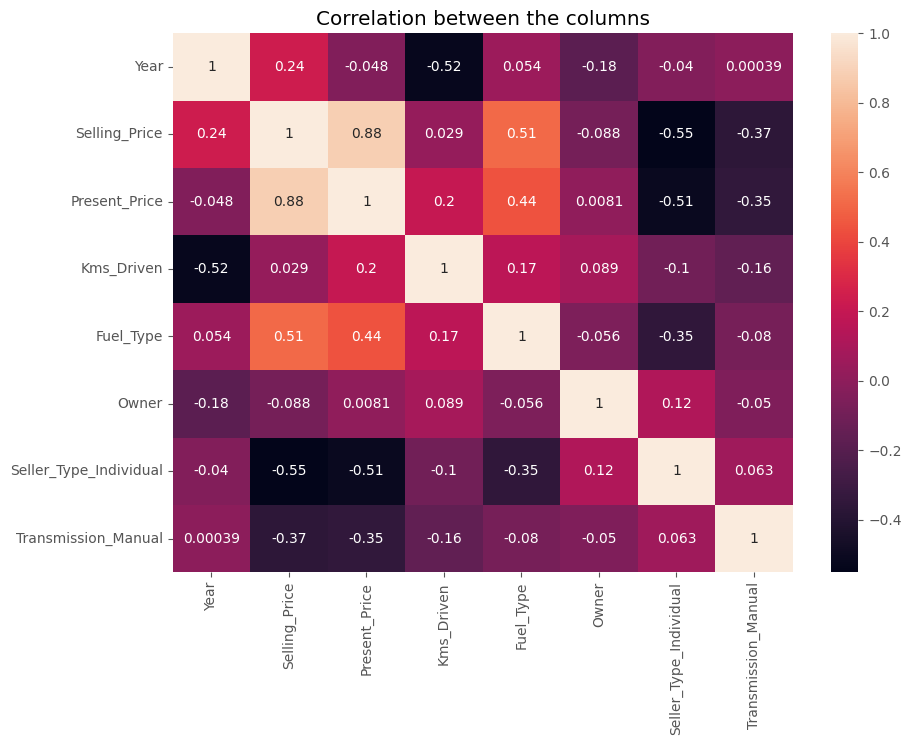

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(numeric_only=True), annot=True)
plt.title('Correlation between the columns')
plt.show()

<Axes: title={'center': 'Correlation between present price and selling price'}, xlabel='Present_Price', ylabel='Selling_Price'>

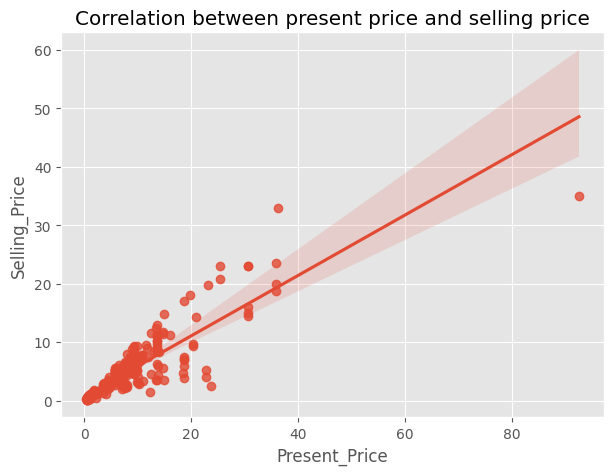

In [32]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y= car_data['Selling_Price']

In [55]:
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (301, 7)
Shape of y: (301,)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()

In [62]:
model.fit(X_train, y_train)

LinearRegression()

In [63]:
predictions = model.predict(X_test)

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [67]:
print(f"MAE: {mean_absolute_error(predictions, y_test)}")
print(f"MSE: {mean_squared_error(predictions, y_test)}")
print(f"R2 score: {r2_score(predictions, y_test)}")

MAE: 1.258140470647337
MSE: 3.493286026225147
R2 score: 0.8294933369778817
